In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Set display options to show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# Importing all datasets
df = pd.read_csv("C:\\Users\\sumne\\Downloads\\Lead+Scoring+Case+Study\\Lead Scoring Assignment\\Leads.csv")
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [4]:
df.shape

(9240, 37)

In [5]:
df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

# 1.Data Cleaning and Processing

In [6]:
# Dropping irrelevant columns (e.g., Prospect ID, Lead Number)
df.drop(['Prospect ID', 'Lead Number'], axis=1, inplace=True)
df.head()

Lead Origin     Lead Source Do Not Email Do Not Call  \
0                      API      Olark Chat           No          No   
1                      API  Organic Search           No          No   
2  Landing Page Submission  Direct Traffic           No          No   
3  Landing Page Submission  Direct Traffic           No          No   
4  Landing Page Submission          Google           No          No   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity Country           Specialization  \
0  Page Visited on Website     NaN                   Select   
1             Email Opened   India                   Select   
2             Email Opened   India  Business Administration   
3              Unreachable   India    Media and Advertising   
4        Converted to Lead   India                   Select   

  How did you hear about X Education What is your current occupation  \
0                             Select                      Unemployed   
1                             Select                      Unemployed   
2                             Select                         Student   
3                      Word Of Mouth                      Unemployed   
4                              Other                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                                No                        No          Select   
4                                No                        No          Select   

     City Asymmetrique Activity Index Asymmetrique Profile Index  \
0  Select                   02.Medium                  02.Medium   
1  Select                   02.Medium                 

In [7]:
#Checking value counts and types to further drop unnecessary columns
for i in df.columns:
    print(df[i].value_counts())

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64
Do Not Email
No     8506
Yes     734
Name: count, dtype: int64
Do Not Call
No     9238
Yes       2
Name: count, dtype: int64
Converted
0    5679
1    3561
Name: count, dtype: int64
TotalVisits
0.0      2189
2.0      16

In [8]:
# Column 'Magazine', 'I agree to pay the amount through cheque','Receive More Updates About Our Courses', 'Update me on Supply Chain Content' 
# 'Get updates on DM Content' only have NO values hence are of no use
col_tobe_dropped = ['Magazine', 'I agree to pay the amount through cheque','Receive More Updates About Our Courses', 'Update me on Supply Chain Content','Get updates on DM Content']


In [9]:
df.drop(col_tobe_dropped, axis=1, inplace=True)
df.head()

Lead Origin     Lead Source Do Not Email Do Not Call  \
0                      API      Olark Chat           No          No   
1                      API  Organic Search           No          No   
2  Landing Page Submission  Direct Traffic           No          No   
3  Landing Page Submission  Direct Traffic           No          No   
4  Landing Page Submission          Google           No          No   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity Country           Specialization  \
0  Page Visited on Website     NaN                   Select   
1             Email Opened   India                   Select   
2             Email Opened   India  Business Administration   
3              Unreachable   India    Media and Advertising   
4        Converted to Lead   India                   Select   

  How did you hear about X Education What is your current occupation  \
0                             Select                      Unemployed   
1                             Select                      Unemployed   
2                             Select                         Student   
3                      Word Of Mouth                      Unemployed   
4                              Other                      Unemployed   

  What matters most to you in choosing a course Search Newspaper Article  \
0                       Better Career Prospects     No                No   
1                       Better Career Prospects     No                No   
2                       Better Career Prospects     No                No   
3                       Better Career Prospects     No                No   
4                       Better Career Prospects     No                No   

  X Education Forums Newspaper Digital Advertisement Through Recommendations  \
0                 No        No                    No                      No   
1                 No        No                    No                      No   
2                 No        No                    No                      No   
3                 No        No                    No                      No   
4                 No        No                    No                      No   

                                  Tags      Lead Quality    Lead Profile  \
0          Interested in other courses  Low in Relevance          Select   
1                              Ringing               NaN          Select   
2  Will revert after reading the email          Might be  Potential Lead   
3                              Ringing          Not Sure          Select   
4  Will revert after reading the email          Might be          Select   

     City Asymmetrique Activity Index Asymmetrique Profile Index  \
0  Select                   02.Medium                  02.Medium   
1  Select                   02.Medium                  02.Medium   
2  Mumbai                   02.Medium                    01.High   
3  Mumbai                   02.Medium                    01.High   
4  Mumbai                   02.Medium                    01.High   

   Asymmetrique Activity Score  Asymmetrique Profile Score  \
0                         15.0                        15.0   
1                         15.0                        15.0   
2                         14.0                        20.0   
3                         13.0                        17.0   
4                         15.0                        18.0   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No             

### Dropping columns with data imbalance

In [10]:
# Checking imbalance, since many columns have highly imbalanced data
df['Do Not Call'].value_counts()

Do Not Call
No     9238
Yes       2
Name: count, dtype: int64

In [11]:
df['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [12]:
df.drop(['Do Not Call','What matters most to you in choosing a course'], axis=1, inplace=True)
df.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity Country           Specialization  \
0  Page Visited on Website     NaN                   Select   
1             Email Opened   India                   Select   
2             Email Opened   India  Business Administration   
3              Unreachable   India    Media and Advertising   
4        Converted to Lead   India                   Select   

  How did you hear about X Education What is your current occupation Search  \
0                             Select                      Unemployed     No   
1                             Select                      Unemployed     No   
2                             Select                         Student     No   
3                      Word Of Mouth                      Unemployed     No   
4                              Other                      Unemployed     No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations                                 Tags  \
0                      No          Interested in other courses   
1                      No                              Ringing   
2                      No  Will revert after reading the email   
3                      No                              Ringing   
4                      No  Will revert after reading the email   

       Lead Quality    Lead Profile    City Asymmetrique Activity Index  \
0  Low in Relevance          Select  Select                   02.Medium   
1               NaN          Select  Select                   02.Medium   
2          Might be  Potential Lead  Mumbai                   02.Medium   
3          Not Sure          Select  Mumbai                   02.Medium   
4          Might be          Select  Mumbai                   02.Medium   

  Asymmetrique Profile Index  Asymmetrique Activity Score  \
0                  02.Medium                         15.0   
1                  02.Medium                         15.0   
2                    01.High                         14.0   
3                    01.High                         13.0   
4                    01.High                         15.0   

   Asymmetrique Profile Score A free copy of Mastering The Interview  \
0                        15.0                                     No   
1                        15.0                                     No   
2                        20.0                                    Yes   
3                        17.0                                     No   
4                        18.0                                     No   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

In [13]:
# Handling 'Select' values in categorical variables
df.replace('Select', np.nan, inplace=True)

### NULL Value treatment

In [14]:
#Checking % of null values
(df.isnull().sum()*100)/df.shape[0]

Lead Origin                                0.000000
Lead Source                                0.389610
Do Not Email                               0.000000
Converted                                  0.000000
TotalVisits                                1.482684
Total Time Spent on Website                0.000000
Page Views Per Visit                       1.482684
Last Activity                              1.114719
Country                                   26.634199
Specialization                            36.580087
How did you hear about X Education        78.463203
What is your current occupation           29.112554
Search                                     0.000000
Newspaper Article                          0.000000
X Education Forums                         0.000000
Newspaper                                  0.000000
Digital Advertisement                      0.000000
Through Recommendations                    0.000000
Tags                                      36.287879
Lead Quality

### Columns like 'How did you hear about X Education','Lead Quality','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Profile Score','Asymmetrique Activity Score' have more than 45% null values

In [15]:
col_tobe_dropped2 = ['How did you hear about X Education','Lead Quality','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Profile Score','Asymmetrique Activity Score']

In [16]:
df.drop(col_tobe_dropped2, axis=1, inplace=True)
df.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity Country           Specialization  \
0  Page Visited on Website     NaN                      NaN   
1             Email Opened   India                      NaN   
2             Email Opened   India  Business Administration   
3              Unreachable   India    Media and Advertising   
4        Converted to Lead   India                      NaN   

  What is your current occupation Search Newspaper Article X Education Forums  \
0                      Unemployed     No                No                 No   
1                      Unemployed     No                No                 No   
2                         Student     No                No                 No   
3                      Unemployed     No                No                 No   
4                      Unemployed     No                No                 No   

  Newspaper Digital Advertisement Through Recommendations  \
0        No                    No                      No   
1        No                    No                      No   
2        No                    No                      No   
3        No                    No                      No   
4        No                    No                      No   

                                  Tags    City  \
0          Interested in other courses     NaN   
1                              Ringing     NaN   
2  Will revert after reading the email  Mumbai   
3                              Ringing  Mumbai   
4  Will revert after reading the email  Mumbai   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

### 1.Lead Source

In [17]:
print(df['Lead Source'].value_counts())
print(df['Lead Source'].isnull().sum())

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64
36


In [18]:
df['Lead Source'].fillna(df['Lead Source'].mode()[0], inplace=True)

In [19]:
print(df['Lead Source'].value_counts())
print(df['Lead Source'].isnull().sum())

Lead Source
Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64
0


### 2.TotalVisits

In [20]:
print(df['TotalVisits'].value_counts())
print(df['TotalVisits'].isnull().sum())

TotalVisits
0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: count, dtype: int64
137


In [21]:
#Let's fill the null values with mode
df['TotalVisits'].fillna(df['TotalVisits'].mode()[0], inplace=True)

In [22]:
#We have three outliers which we can safely remove: 115, 141, 251
df = df[df['TotalVisits']<100]

In [23]:
print(df['TotalVisits'].value_counts())
print(df['TotalVisits'].isnull().sum())

TotalVisits
0.0     2326
2.0     1680
3.0     1306
4.0     1120
5.0      783
6.0      466
1.0      395
7.0      309
8.0      224
9.0      164
10.0     114
11.0      86
13.0      48
12.0      45
14.0      36
16.0      21
15.0      18
17.0      16
18.0      15
20.0      12
19.0       9
21.0       6
23.0       6
25.0       5
24.0       5
27.0       5
22.0       3
29.0       2
28.0       2
26.0       2
55.0       1
30.0       1
43.0       1
74.0       1
41.0       1
54.0       1
32.0       1
42.0       1
Name: count, dtype: int64
0


### 3.Page Views Per Visit

In [24]:
print(df['Page Views Per Visit'].value_counts())

Page Views Per Visit
0.00     2189
2.00     1795
3.00     1196
4.00      896
1.00      651
5.00      517
1.50      306
6.00      244
2.50      241
7.00      133
3.50       94
8.00       86
1.33       66
1.67       60
2.33       59
2.67       54
9.00       45
4.50       43
1.75       28
3.33       27
10.00      25
1.25       23
5.50       21
2.25       19
11.00      18
3.67       16
1.80       13
6.50       13
2.75       12
1.40       11
2.20        9
4.33        9
14.00       9
2.80        9
2.17        8
1.60        8
3.25        8
13.00       6
2.40        6
12.00       5
1.20        5
1.43        4
2.60        4
15.00       4
1.83        4
3.40        4
1.71        4
4.25        3
1.38        3
5.67        3
16.00       3
1.78        3
4.75        3
1.57        3
7.50        2
1.23        2
1.14        2
2.71        2
1.22        2
3.75        2
5.40        2
1.56        2
2.83        2
2.09        2
3.60        2
3.20        2
2.22        2
5.33        2
5.25        2
1.93        1

In [25]:
print(df['Page Views Per Visit'].isnull().sum())

137


In [26]:
#Let's fill the null values with mode
df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].mode()[0], inplace=True)

In [27]:
print(df['Page Views Per Visit'].value_counts())

Page Views Per Visit
0.00     2326
2.00     1795
3.00     1196
4.00      896
1.00      651
5.00      517
1.50      306
6.00      244
2.50      241
7.00      133
3.50       94
8.00       86
1.33       66
1.67       60
2.33       59
2.67       54
9.00       45
4.50       43
1.75       28
3.33       27
10.00      25
1.25       23
5.50       21
2.25       19
11.00      18
3.67       16
1.80       13
6.50       13
2.75       12
1.40       11
2.20        9
4.33        9
14.00       9
2.80        9
2.17        8
1.60        8
3.25        8
13.00       6
2.40        6
12.00       5
1.20        5
1.43        4
2.60        4
15.00       4
1.83        4
3.40        4
1.71        4
4.25        3
1.38        3
5.67        3
16.00       3
1.78        3
4.75        3
1.57        3
7.50        2
1.23        2
1.14        2
2.71        2
1.22        2
3.75        2
5.40        2
1.56        2
2.83        2
2.09        2
3.60        2
3.20        2
2.22        2
5.33        2
5.25        2
1.93        1

In [28]:
print(df['Page Views Per Visit'].isnull().sum())

0


### 3.Last Activity

In [29]:
print(df['Last Activity'].value_counts())
print(df['Last Activity'].isnull().sum())

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          637
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64
103


#### Last Activity seems to be descriptive information and is of no use and can be dropped

In [30]:
df.drop('Last Activity', axis=1, inplace=True)


#### Last Notable Activity is also a similar variable and can be dropped
df.drop('Last Notable Activity', axis=1, inplace=True)

### 4.Country

In [31]:
print(df['Country'].value_counts())
print(df['Country'].isnull().sum())

Country
India                   6489
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

### A significant amount of rows don't have a country. The dataset doesn't talk about any country specific tailored plan so it van be dropped.


In [32]:
df.drop('Country', axis=1, inplace=True)

### 5. Specialization

In [33]:
print(df['Specialization'].value_counts())
print(df['Specialization'].isnull().sum())

Specialization
Finance Management                   976
Human Resource Management            847
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              348
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                72
E-Business                            57
Services Excellence                   40
Name: count, dtype: int64
3380


#### Since specialization can be an important factor, dropping it won't make sense. Let's replace it with 'Not Specified'

In [34]:
df['Specialization'].fillna('Not Specified', inplace = True)

In [35]:
print(df['Specialization'].value_counts())
print(df['Specialization'].isnull().sum())

Specialization
Not Specified                        3380
Finance Management                    976
Human Resource Management             847
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               348
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 72
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64
0


### 6.What is your current occupation

In [36]:
print(df['What is your current occupation'].value_counts())
print(df['What is your current occupation'].isnull().sum())

What is your current occupation
Unemployed              5598
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64
2689


#### Occupation can also be a model building factor, hence it's better to create a new category than drop it. Using mode will create data imblanace 

In [37]:
df['What is your current occupation'].fillna('Not Specified', inplace = True)

In [38]:
print(df['What is your current occupation'].value_counts())
print(df['What is your current occupation'].isnull().sum())

What is your current occupation
Unemployed              5598
Not Specified           2689
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64
0


### 7. tags

In [39]:
print(df['Tags'].value_counts())
print(df['Tags'].isnull().sum())

Tags
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           512
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to O

#### Tags more or less, appear to be Sales teams' notes and hence can be dropped

In [40]:
df.drop('Tags', axis=1, inplace=True)

### 8. City

In [41]:
print(df['City'].value_counts())
print(df['City'].isnull().sum())

City
Mumbai                         3219
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64
3669


#### Since this column has scattered values in different categories, It's better to divide all cities in three categories: 'Metro Cities', 'Non-Metro' and 'Not Mentioned'.

In [42]:
def city_categorization(city):
    if city in ['Mumbai', 'Other Metro Cities']:
        return 'Metro City'
    elif city in ['Tier II Cities', 'Thane & Outskirts', 'Other Cities', 'Other Cities of Maharashtra']:
        return 'Non-Metro City'
    else:
        return 'Not Mentioned'

In [43]:
# Let's simplifiy City into three broad City Categories
df['City Category'] = df['City'].apply(city_categorization)

In [44]:
#Let's now drop 'City'
df.drop('City', axis=1, inplace=True)

In [45]:
print(df['City Category'].value_counts())
print(df['City Category'].isnull().sum())

City Category
Not Mentioned     3669
Metro City        3599
Non-Metro City    1969
Name: count, dtype: int64
0


In [46]:
#Check if any further null values
(df.isnull().sum()*100)/df.shape[0]

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Specialization                            0.0
What is your current occupation           0.0
Search                                    0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
A free copy of Mastering The Interview    0.0
City Category                             0.0
dtype: float64

### Now we have no more null values &#128516;

# 2. Data Transformation

### Label Encoding all Yes/No to 1/0 

In [47]:
label_encod = ['Do Not Email','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']

In [48]:
#Replacing all Yes/No to 1/0
df[label_encod] = df[label_encod].replace({'Yes': 1, 'No': 0})

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9237 entries, 0 to 9239
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9237 non-null   object 
 1   Lead Source                             9237 non-null   object 
 2   Do Not Email                            9237 non-null   int64  
 3   Converted                               9237 non-null   int64  
 4   TotalVisits                             9237 non-null   float64
 5   Total Time Spent on Website             9237 non-null   int64  
 6   Page Views Per Visit                    9237 non-null   float64
 7   Specialization                          9237 non-null   object 
 8   What is your current occupation         9237 non-null   object 
 9   Search                                  9237 non-null   int64  
 10  Newspaper Article                       9237 non-null   int64  
 

### Data types of all the columns seem alright. 
### Exploratory data Analysis: Let's plot all categorical columns to see their distributions and get some basic insights

### Categorical Variables : Univariate Analysis

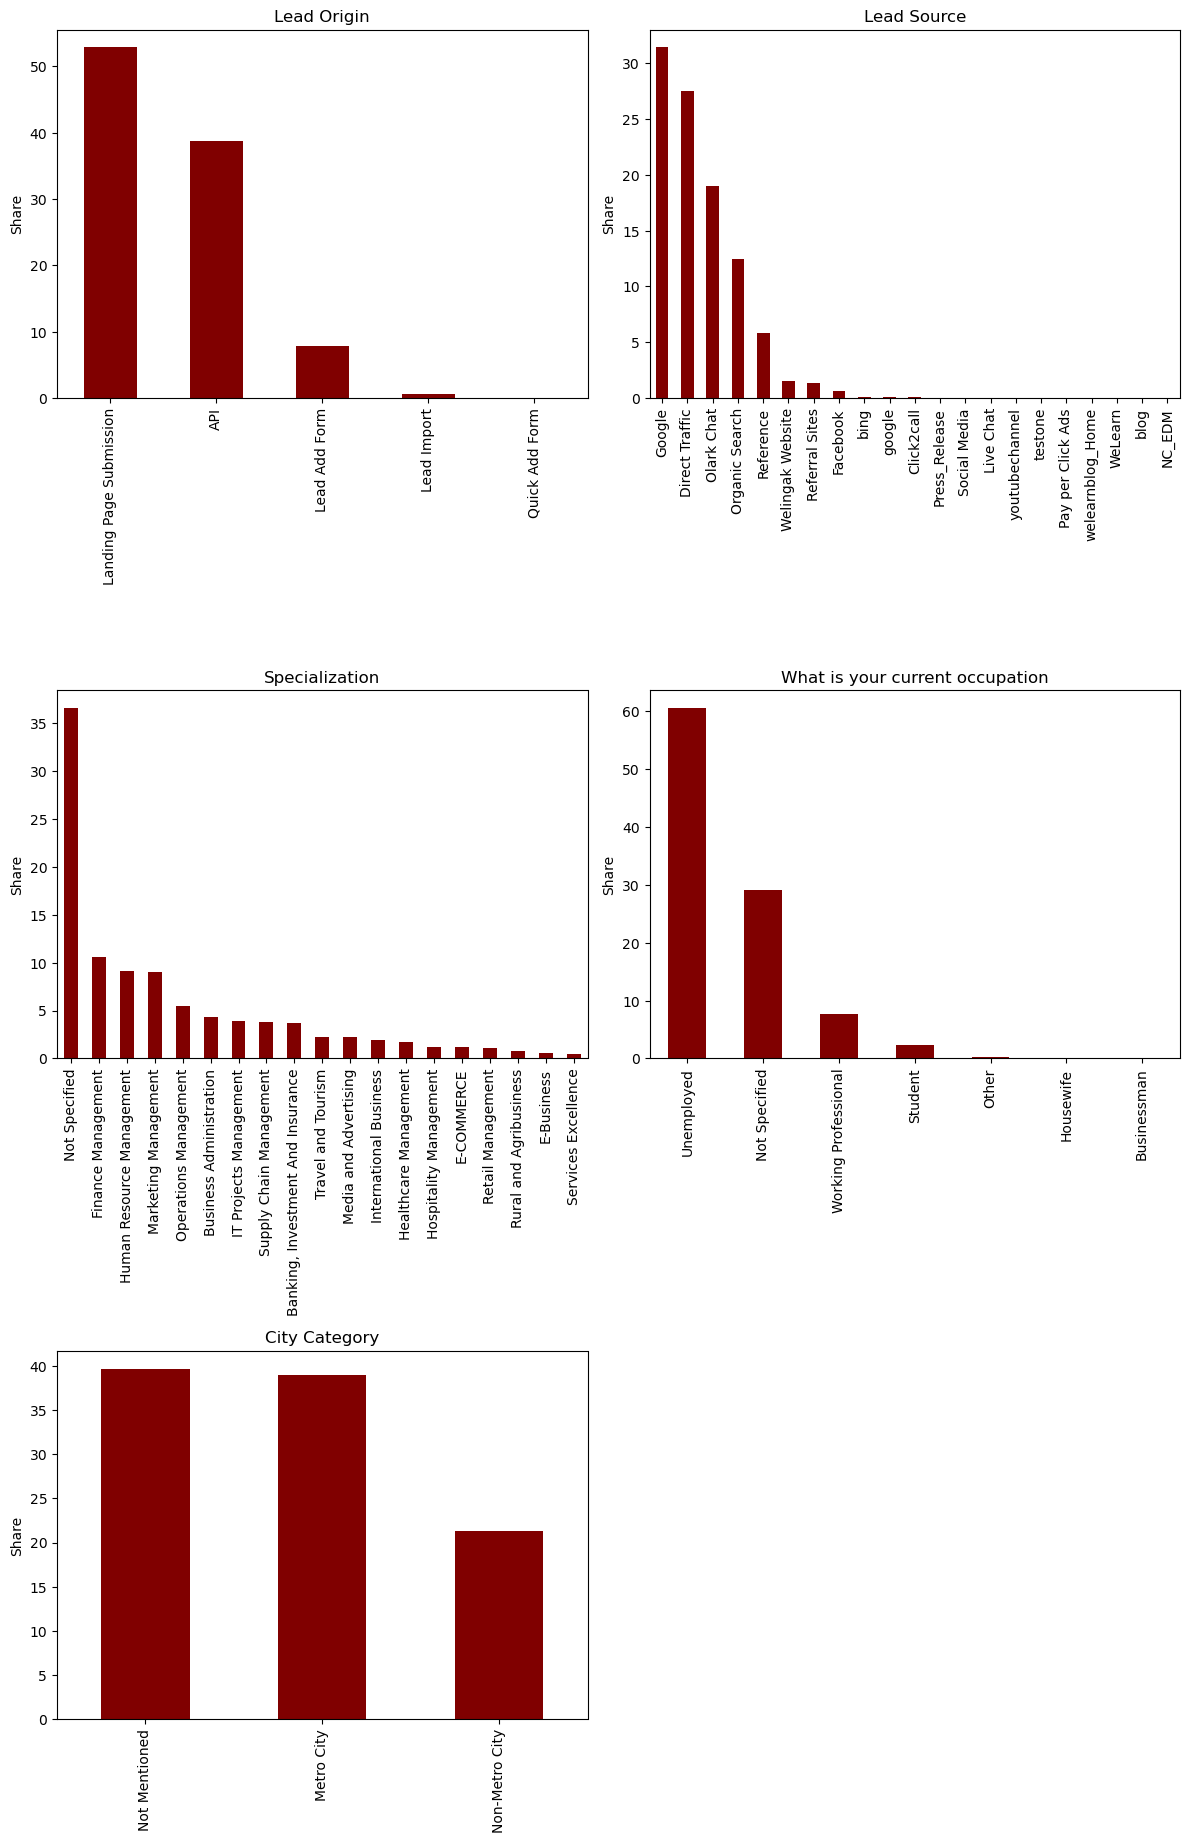

In [50]:
# Filtering out all the categorical columns
categorical_columns = df.select_dtypes(include = ['object']).columns

# Set up the figure size
plt.figure(figsize=(12, 24), dpi=100)

# Loop through each column and create subplots
for index, column in enumerate(categorical_columns, start=1):
    plt.subplot(4, 2, index)
    (df[column].value_counts(normalize=True)*100).plot.bar(width=0.5, color='maroon')
    plt.title(column)
    plt.xlabel('')
    plt.ylabel('Share')
    plt.xticks(rotation=90)

# Adjust layout and display the combined subplot
plt.tight_layout()
plt.show()


#### Basic Insights: 
- Landing page submission and APIs are responsible for more than 85% of the leads origin.
- Google, Direct Traffic, Olark Chat and Organic search are top four lead sources accounting for around 80% of the total
- Finance, HRM and Marketing managment are top searches of these kinda courses
- Around 60% of the leads came from unemployed professionls, indicating a trend for upskilling to find better prospects
- From the provided information, more leads came from Metro cities

#### Plotting all the Y/N variables.
#### Yes - 1 and No - 0

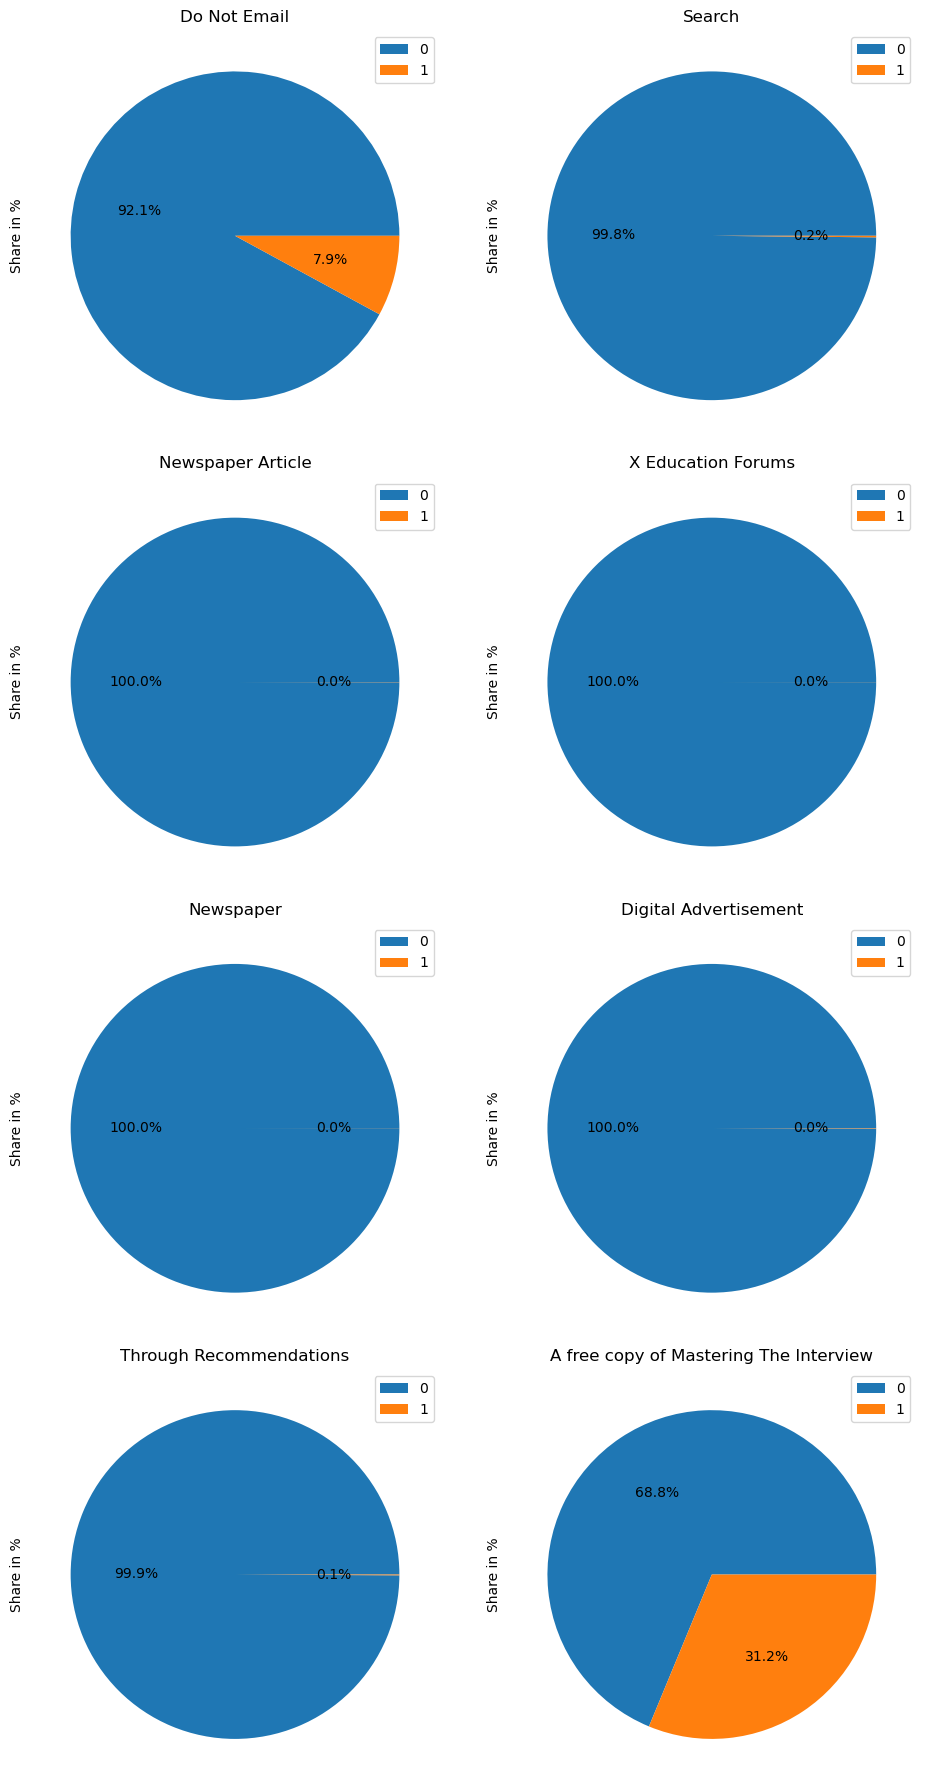

In [51]:
# Set up the figure size
plt.figure(figsize=(10, 18), dpi=100)

# Loop through each column and create subplots
for index, column in enumerate(label_encod, start=1):
    plt.subplot(4, 2, index)
    (df[column].value_counts(normalize=True)*100).plot.pie(autopct='%1.1f%%', labeldistance=None)
    plt.title(column)
    plt.xlabel('')
    plt.ylabel('Share in %')
    plt.xticks(rotation=90)
    plt.legend()

# Adjust layout and display the combined subplot
plt.tight_layout()
plt.show()


#### Basic Insights:
- Only around 8% of the customers opted for 'Do not email' indicating EMAIL as a preferred method of contact
- Around 31% of the leads marked yes for receiving 'A free copy of mastering the interview', indicating their primary motive of landing a good job. This is also proven by the fact that majority of the leads were given by unemployed people.

In [52]:
numerical_columns = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

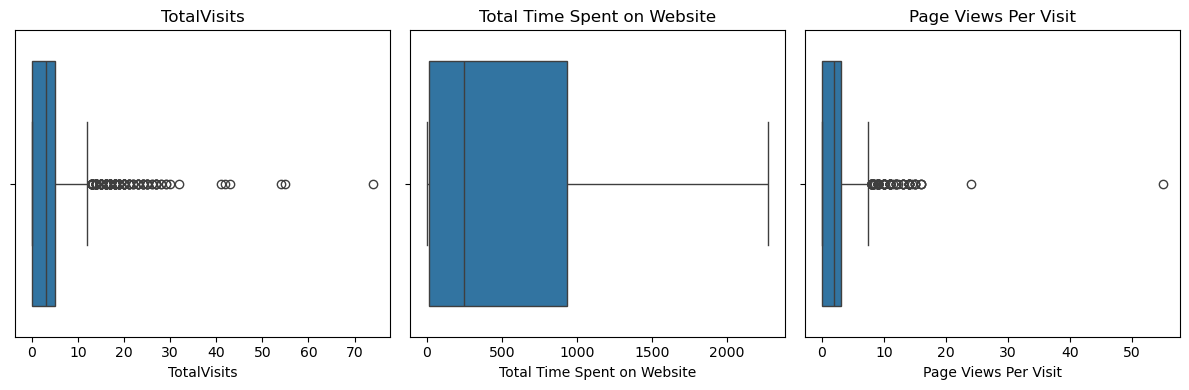

In [53]:
# Set up the figure size
plt.figure(figsize=(12, 4), dpi=100)

# Create box plots for each numerical column

for index, column in enumerate(numerical_columns, start=1):
    plt.subplot(1, 3, index)
    sns.boxplot(x=df[column])
    plt.title(column)
    plt.xlabel(column)


# Adjust layout and display the combined subplot
plt.tight_layout()
plt.show()


### Dealing with Outliers:

#### 1. TotalVisits

In [54]:
df['TotalVisits'].value_counts()

TotalVisits
0.0     2326
2.0     1680
3.0     1306
4.0     1120
5.0      783
6.0      466
1.0      395
7.0      309
8.0      224
9.0      164
10.0     114
11.0      86
13.0      48
12.0      45
14.0      36
16.0      21
15.0      18
17.0      16
18.0      15
20.0      12
19.0       9
21.0       6
23.0       6
25.0       5
24.0       5
27.0       5
22.0       3
29.0       2
28.0       2
26.0       2
55.0       1
30.0       1
43.0       1
74.0       1
41.0       1
54.0       1
32.0       1
42.0       1
Name: count, dtype: int64

#### Let's fix the upper limit of TotalVisits column to 30, since these outliers(7 in total) can skew the model

In [55]:
# Lets filter the dataset
df= df[df['TotalVisits']<30]

### 2. Page Views per Visit

In [56]:
df['Page Views Per Visit'].value_counts()

Page Views Per Visit
0.00     2326
2.00     1795
3.00     1196
4.00      896
1.00      651
5.00      517
1.50      306
6.00      244
2.50      241
7.00      133
3.50       94
8.00       86
1.33       66
1.67       60
2.33       59
2.67       54
9.00       45
4.50       42
1.75       28
3.33       27
10.00      24
1.25       23
5.50       21
2.25       19
11.00      18
3.67       16
1.80       13
6.50       13
2.75       12
1.40       11
4.33        9
14.00       9
2.20        9
2.80        9
2.17        8
3.25        8
1.60        8
2.40        6
13.00       6
1.20        5
12.00       5
1.43        4
2.60        4
1.83        4
15.00       4
1.71        4
3.40        4
4.25        3
1.57        3
5.67        3
1.38        3
16.00       3
4.75        3
1.22        2
3.60        2
7.50        2
1.78        2
1.23        2
3.20        2
5.40        2
1.56        2
2.83        2
2.22        2
3.75        2
5.25        2
5.33        2
2.09        2
2.71        2
6.67        1
3.29        1

#### Binning the 'Page Views Per Visit' variable might be a reasonable approach, especially if you're interested in grouping similar values together and reducing the impact of extreme values. Let's use pd.cut to check the distribution

In [57]:
# Define bin edges
bin_edges = [0, 1, 2, 3, 4, 5, 10, 20, float('inf')] 

# Define bin labels
bin_labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-10', '10-20', '20+']

# Create bins using pd.cut()
df['Page Views Range Per Visit'] = pd.cut(df['Page Views Per Visit'], bins=bin_edges, labels=bin_labels, right=False)


In [58]:
# Let's drop Page views per visit
df.drop('Page Views Per Visit', axis=1, inplace=True)

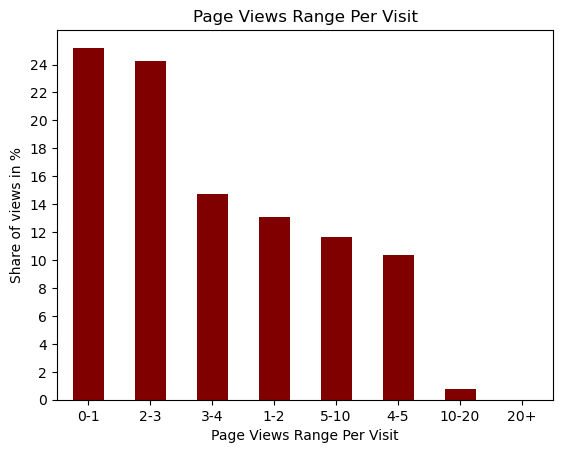

In [59]:
(df['Page Views Range Per Visit'].value_counts(normalize=True)*100).plot.bar(width=0.5, color='maroon')
plt.title('Page Views Range Per Visit')
plt.ylabel('Share of views in %')
ticks = np.arange(0, 25, 2)
plt.xticks(rotation=0)
plt.yticks(ticks)
plt.show()

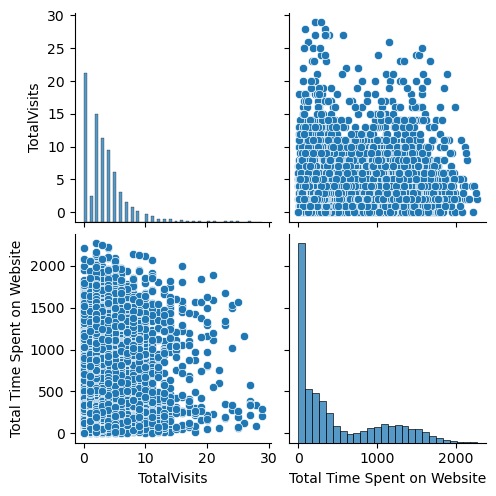

In [60]:
sns.pairplot(df[['TotalVisits','Total Time Spent on Website']])
plt.show()

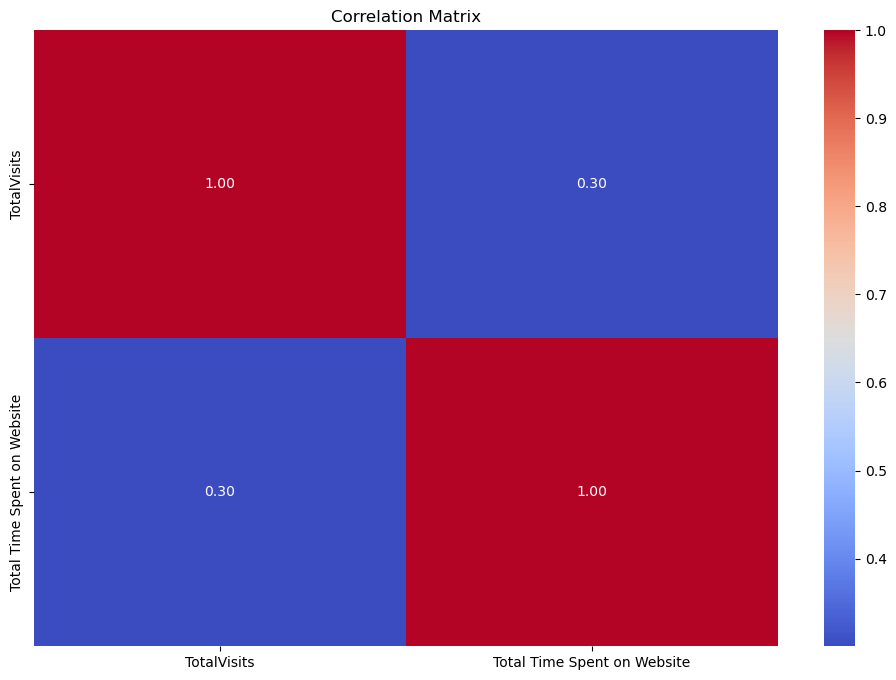

In [61]:
# Creating a Heatmap
correlation_matrix = df[['TotalVisits','Total Time Spent on Website']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Basic Insights:
- Total time spent on website vs page views per visit: There appears to be a positive correlation between total time spent on website and page views per visit. This means that people who spend more time on the website tend to visit more pages. This relationship is not perfectly linear, and there is some scatter in the data.

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9229 entries, 0 to 9239
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   Lead Origin                             9229 non-null   object  
 1   Lead Source                             9229 non-null   object  
 2   Do Not Email                            9229 non-null   int64   
 3   Converted                               9229 non-null   int64   
 4   TotalVisits                             9229 non-null   float64 
 5   Total Time Spent on Website             9229 non-null   int64   
 6   Specialization                          9229 non-null   object  
 7   What is your current occupation         9229 non-null   object  
 8   Search                                  9229 non-null   int64   
 9   Newspaper Article                       9229 non-null   int64   
 10  X Education Forums                      9229 non-null

# 3. Data Preparation

In [63]:
# Encoding categorical variables
df = pd.get_dummies(df, drop_first=True, dtype=int)
df.head()

Do Not Email  Converted  TotalVisits  Total Time Spent on Website  Search  \
0             0          0          0.0                            0       0   
1             0          0          5.0                          674       0   
2             0          1          2.0                         1532       0   
3             0          0          1.0                          305       0   
4             0          1          2.0                         1428       0   

   Newspaper Article  X Education Forums  Newspaper  Digital Advertisement  \
0                  0                   0          0                      0   
1                  0                   0          0                      0   
2                  0                   0          0                      0   
3                  0                   0          0                      0   
4                  0                   0          0                      0   

   Through Recommendations  A free copy of Mastering The Interview  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       1   
3                        0                                       0   
4                        0                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
0                           0                     0                   0   
1                           0                     0                   0   
2                           1                     0                   0   
3                           1                     0                   0   
4                           0                     0                   1   

   Lead Source_Live Chat  Lead Source_NC_EDM  Lead Source_Olark Chat  \
0                      0                   0                       1   
1                      0                   0                       0   
2                      0                   0                       0   
3                      0                   0                       0   
4                      0                   0                       0   

   Lead Source_Organic Search  Lead Source_Pay per Click Ads  \
0                           0                              0   
1                           1                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   Lead Source_Press_Release  Lead Source_Reference  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   Lead Source_Referral Sites  Lead Source_Social Media  Lead Source_WeLearn  \
0                           0                         0                    0   
1                           0                         0                    0   
2                           

In [64]:
df.describe()

Do Not Email    Converted  TotalVisits  Total Time Spent on Website  \
count   9229.000000  9229.000000  9229.000000                  9229.000000   
mean       0.078882     0.385741     3.303066                   487.695850   
std        0.269569     0.486796     3.407508                   548.092931   
min        0.000000     0.000000     0.000000                     0.000000   
25%        0.000000     0.000000     0.000000                    12.000000   
50%        0.000000     0.000000     3.000000                   248.000000   
75%        0.000000     1.000000     5.000000                   936.000000   
max        1.000000     1.000000    29.000000                  2272.000000   

            Search  Newspaper Article  X Education Forums    Newspaper  \
count  9229.000000        9229.000000         9229.000000  9229.000000   
mean      0.001517           0.000217            0.000108     0.000108   
std       0.038921           0.014720            0.010409     0.010409   
min       0.000000           0.000000            0.000000     0.000000   
25%       0.000000           0.000000            0.000000     0.000000   
50%       0.000000           0.000000            0.000000     0.000000   
75%       0.000000           0.000000            0.000000     0.000000   
max       1.000000           1.000000            1.000000     1.000000   

       Digital Advertisement  Through Recommendations  \
count            9229.000000              9229.000000   
mean                0.000433                 0.000758   
std                 0.020815                 0.027532   
min                 0.000000                 0.000000   
25%                 0.000000                 0.000000   
50%                 0.000000                 0.000000   
75%                 0.000000                 0.000000   
max                 1.000000                 1.000000   

       A free copy of Mastering The Interview  \
count                             9229.000000   
mean                                 0.312493   
std                                  0.463535   
min                                  0.000000   
25%                                  0.000000   
50%                                  0.000000   
75%                                  1.000000   
max                                  1.000000   

       Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
count                          9229.000000                9229.000000   
mean                              0.528335                   0.077798   
std                               0.499224                   0.267868   
min                               0.000000                   0.000000   
25%                               0.000000                   0.000000   
50%                               1.000000                   0.000000   
75%                               1.000000                   0.000000   
max                               1.000000                   1.000000   

       Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
count              9229.000000                 9229.000000   
mean                  0.005959                    0.000108   
std                   0.076971                    0.010409   
min                   0.000000                    0.000000   
25%                   0.000000                    0.000000   
50%                   0.000000                    0.000000   
75%                   0.000000                    0.000000   
max                   1.000000                    1.000000   

       Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
count                 9229.000000           9229.000000         9229.000000   
mean                     0.274678              0.005959            0.314552   
std                      0.446376              0.076971            0.464362   
min                      0.000000              0.000000            0.000000   
25%                      0.000000              0.000000            0.

In [65]:
df.shape

(9229, 68)

In [66]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into features and target variable
X = df.drop('Converted', axis=1)
y = df['Converted']

In [67]:
X.head()

Do Not Email  TotalVisits  Total Time Spent on Website  Search  \
0             0          0.0                            0       0   
1             0          5.0                          674       0   
2             0          2.0                         1532       0   
3             0          1.0                          305       0   
4             0          2.0                         1428       0   

   Newspaper Article  X Education Forums  Newspaper  Digital Advertisement  \
0                  0                   0          0                      0   
1                  0                   0          0                      0   
2                  0                   0          0                      0   
3                  0                   0          0                      0   
4                  0                   0          0                      0   

   Through Recommendations  A free copy of Mastering The Interview  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       1   
3                        0                                       0   
4                        0                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
0                           0                     0                   0   
1                           0                     0                   0   
2                           1                     0                   0   
3                           1                     0                   0   
4                           0                     0                   1   

   Lead Source_Live Chat  Lead Source_NC_EDM  Lead Source_Olark Chat  \
0                      0                   0                       1   
1                      0                   0                       0   
2                      0                   0                       0   
3                      0                   0                       0   
4                      0                   0                       0   

   Lead Source_Organic Search  Lead Source_Pay per Click Ads  \
0                           0                              0   
1                           1                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   Lead Source_Press_Release  Lead Source_Reference  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   Lead Source_Referral Sites  Lead Source_Social Media  Lead Source_WeLearn  \
0                           0                         0                    0   
1                           0                         0                    0   
2                           0                         0                    0   
3             

In [68]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [69]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [70]:
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

X_train: (6460, 67)
X_test: (2769, 67)
y_train: (6460,)
y_test: (2769,)


# 4. Feature Scaling

In [71]:
# Feature Scaling
scaler = StandardScaler() # Creating an object

In [72]:
X_train[['TotalVisits','Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website']])

X_train.head()

Do Not Email  TotalVisits  Total Time Spent on Website  Search  \
3334             1    -0.384523                    -0.835409       0   
712              0    -0.683802                    -0.609190       0   
3938             0    -0.983081                    -0.884666       0   
6636             0     0.513315                     2.205779       0   
2992             0    -0.384523                     1.685840       0   

      Newspaper Article  X Education Forums  Newspaper  Digital Advertisement  \
3334                  0                   0          0                      0   
712                   0                   0          0                      0   
3938                  0                   0          0                      0   
6636                  0                   0          0                      0   
2992                  0                   0          0                      0   

      Through Recommendations  A free copy of Mastering The Interview  \
3334                        0                                       0   
712                         0                                       0   
3938                        0                                       0   
6636                        0                                       1   
2992                        0                                       0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
3334                                    0                          0   
712                                     0                          0   
3938                                    0                          0   
6636                                    1                          0   
2992                                    0                          0   

      Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
3334                        0                           0   
712                         0                           0   
3938                        0                           0   
6636                        0                           0   
2992                        0                           0   

      Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
3334                           0                     0                   1   
712                            0                     0                   1   
3938                           0                     0                   0   
6636                           1                     0                   0   
2992                           0                     0                   1   

      Lead Source_Live Chat  Lead Source_NC_EDM  Lead Source_Olark Chat  \
3334                      0                   0                       0   
712                       0                   0                       0   
3938                      0                   0                       1   
6636                      0                   0                       0   
2992                      0                   0                       0   

      Lead Source_Organic Search  Lead Source_Pay per Click Ads  \
3334                           0                              0   
712                            0                              0   
3938                           0                              0   
6636                           0                              0   
2992                           0                              0   

      Lead Source_Press_Release  Lead Source_Reference  \
3334                          0                      0   
712                           0                      0   
3938                          0                      0   
6636                          0                      0   
2992                          0                      0   

      Lead Source_Referral Sites  Lead Source_Social Media  \
3334                           0                         0   
712                            0                   

In [73]:
df.head()

Do Not Email  Converted  TotalVisits  Total Time Spent on Website  Search  \
0             0          0          0.0                            0       0   
1             0          0          5.0                          674       0   
2             0          1          2.0                         1532       0   
3             0          0          1.0                          305       0   
4             0          1          2.0                         1428       0   

   Newspaper Article  X Education Forums  Newspaper  Digital Advertisement  \
0                  0                   0          0                      0   
1                  0                   0          0                      0   
2                  0                   0          0                      0   
3                  0                   0          0                      0   
4                  0                   0          0                      0   

   Through Recommendations  A free copy of Mastering The Interview  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       1   
3                        0                                       0   
4                        0                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
0                           0                     0                   0   
1                           0                     0                   0   
2                           1                     0                   0   
3                           1                     0                   0   
4                           0                     0                   1   

   Lead Source_Live Chat  Lead Source_NC_EDM  Lead Source_Olark Chat  \
0                      0                   0                       1   
1                      0                   0                       0   
2                      0                   0                       0   
3                      0                   0                       0   
4                      0                   0                       0   

   Lead Source_Organic Search  Lead Source_Pay per Click Ads  \
0                           0                              0   
1                           1                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   Lead Source_Press_Release  Lead Source_Reference  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   Lead Source_Referral Sites  Lead Source_Social Media  Lead Source_WeLearn  \
0                           0                         0                    0   
1                           0                         0                    0   
2                           

### Checking Conversion Rate

In [74]:
conversion = (sum(df['Converted'])/len(df['Converted'].index))*100
conversion

38.57406002817206

# 5. Exploring Correlations

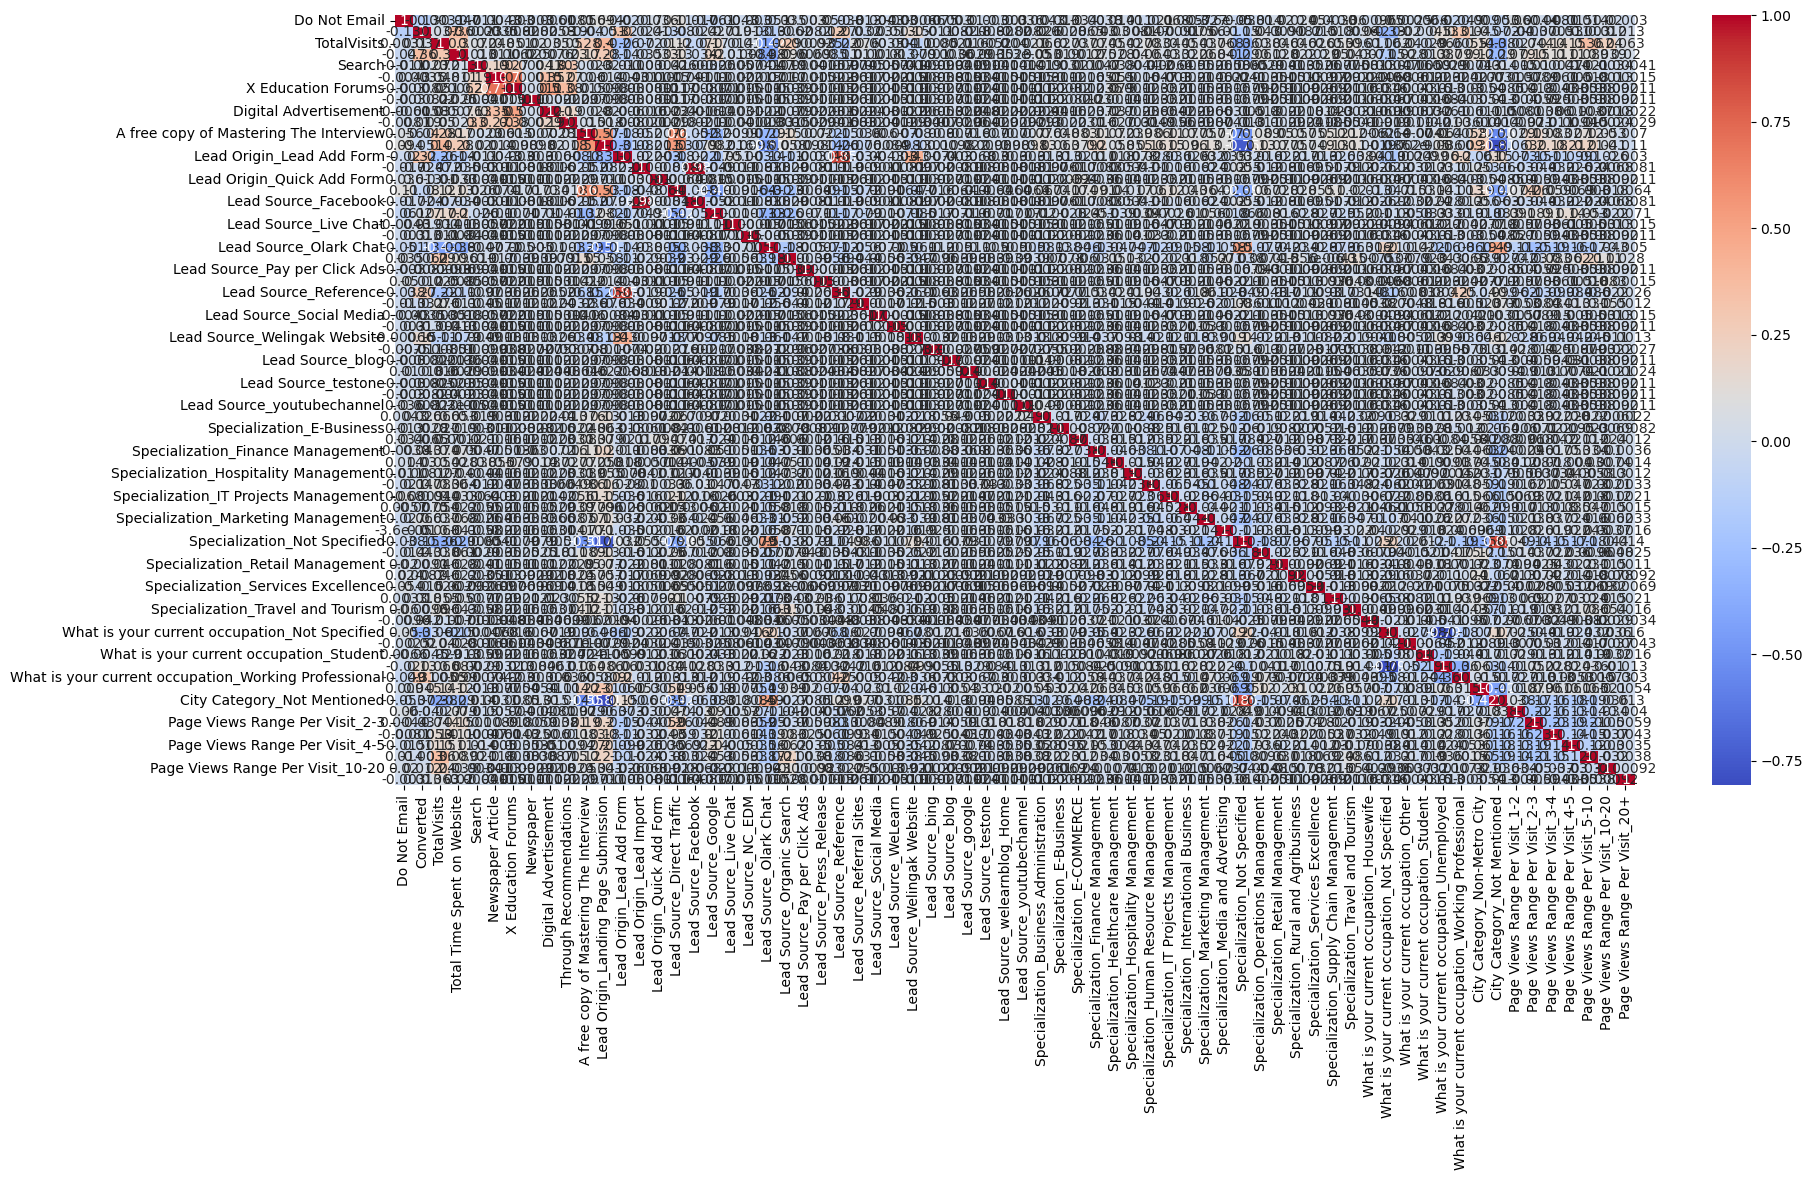

In [75]:
plt.figure(figsize = (20,10))        # Size of the figure

# Creating a heatmap
sns.heatmap(df.corr(),annot = True, cmap='coolwarm')
plt.show()

In [76]:
# Since heatmap is too cluttery
df.corr()

Do Not Email  Converted  \
Do Not Email                                            1.000000  -0.134456   
Converted                                              -0.134456   1.000000   
TotalVisits                                             0.003111   0.036982   
Total Time Spent on Website                            -0.047291   0.362988   
Search                                                 -0.011406  -0.002290   
Newspaper Article                                      -0.004308   0.003456   
X Education Forums                                     -0.003046  -0.008249   
Newspaper                                              -0.003046  -0.008249   
Digital Advertisement                                  -0.006094  -0.005807   
Through Recommendations                                -0.008062   0.018596   
A free copy of Mastering The Interview                  0.055941  -0.040089   
Lead Origin_Landing Page Submission                     0.093708  -0.050777   
Lead Origin_Lead Add Form                              -0.020466   0.321646   
Lead Origin_Lead Import                                -0.017436  -0.023761   
Lead Origin_Quick Add Form                              0.035573   0.013136   
Lead Source_Direct Traffic                              0.107200  -0.080218   
Lead Source_Facebook                                   -0.017436  -0.023761   
Lead Source_Google                                     -0.061459   0.026939   
Lead Source_Live Chat                                  -0.004308   0.018579   
Lead Source_NC_EDM                                     -0.003046   0.013136   
Lead Source_Olark Chat                                 -0.050640  -0.129882   
Lead Source_Organic Search                              0.035207  -0.006154   
Lead Source_Pay per Click Ads                          -0.003046  -0.008249   
Lead Source_Press_Release                               0.050310  -0.011667   
Lead Source_Reference                                  -0.038088   0.270777   
Lead Source_Referral Sites                             -0.012979  -0.031924   
Lead Source_Social Media                               -0.004308   0.003456   
Lead Source_WeLearn                                    -0.003046   0.013136   
Lead Source_Welingak Website                           -0.000657   0.154130   
Lead Source_bing                                       -0.007464  -0.011479   
Lead Source_blog                                       -0.003046  -0.008249   
Lead Source_google                                      0.010461  -0.018450   
Lead Source_testone                                    -0.003046  -0.008249   
Lead Source_welearnblog_Home                           -0.003046  -0.008249   
Lead Source_youtubechannel                              0.035573  -0.008249   
Specialization_Business Administration                  0.004348   0.025649   
Specialization_E-Business                               0.012846  -0.002805   
Specialization_E-COMMERCE                               0.033648  -0.006512   
Specialization_Finance Management                      -0.003805   0.043380   
Specialization_Healthcare Management                    0.013771   0.030223   
Specialization_Hospitality Management                   0.010945   0.008113   
Specialization_Human Resource Management               -0.020624   0.047246   
Specialization_IT Projects Management                   0.068492  -0.000908   
Specialization_International Business                   0.005726  -0.007545   
Specialization_Marketing Management                    -0.026629   0.065992   
Specialization_Media and Advertising                   -0.000036   0.010160   
Specialization_Not Specified                           -0.037810  -0.154017   
Specialization_Operations Management                   -0.013595   0.043119   
Specialization_Retail Management                        0.020255  -0.009050   
Specialization_Rural and Agribusiness                   0.024309   0.008164   
Specialization_Services

# 6. Building the Model

In [77]:
# Since Corr map was too cluttery, we can use Manual plus RFE to select features for us
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

logreg = LogisticRegression()

In [79]:
# Starting RFE with 15 features
rfe = RFE(estimator=logreg, n_features_to_select=15)
# Fitting the variable
rfe = rfe.fit(X_train, y_train)

In [80]:
rfe.support_

array([ True, False,  True, False, False, False, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False,  True,  True,
       False, False, False,  True, False, False,  True,  True,  True,
        True,  True,  True, False])

In [81]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 24),
 ('Total Time Spent on Website', True, 1),
 ('Search', False, 20),
 ('Newspaper Article', False, 9),
 ('X Education Forums', False, 18),
 ('Newspaper', False, 52),
 ('Digital Advertisement', False, 23),
 ('Through Recommendations', False, 17),
 ('A free copy of Mastering The Interview', False, 22),
 ('Lead Origin_Landing Page Submission', False, 2),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Origin_Quick Add Form', False, 50),
 ('Lead Source_Direct Traffic', False, 47),
 ('Lead Source_Facebook', False, 5),
 ('Lead Source_Google', False, 16),
 ('Lead Source_Live Chat', False, 12),
 ('Lead Source_NC_EDM', False, 4),
 ('Lead Source_Olark Chat', False, 39),
 ('Lead Source_Organic Search', False, 31),
 ('Lead Source_Pay per Click Ads', False, 25),
 ('Lead Source_Press_Release', False, 51),
 ('Lead Source_Reference', False, 34),
 ('Lead Source_Referral Sites', False, 21),
 ('Lead Source_Soci

In [82]:
#Creating a list of the selected columns by RFE
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Welingak Website', 'Specialization_Not Specified',
       'What is your current occupation_Housewife',
       'What is your current occupation_Not Specified',
       'What is your current occupation_Working Professional',
       'Page Views Range Per Visit_1-2', 'Page Views Range Per Visit_2-3',
       'Page Views Range Per Visit_3-4', 'Page Views Range Per Visit_4-5',
       'Page Views Range Per Visit_5-10', 'Page Views Range Per Visit_10-20'],
      dtype='object')

In [83]:
# Checking features removed
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Search', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Quick Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Heal

In [84]:
# creating a new dataframe with RFE suggested Features
X_train_RFE = X_train[col]
X_train_RFE.head()

Do Not Email  Total Time Spent on Website  Lead Origin_Lead Add Form  \
3334             1                    -0.835409                          0   
712              0                    -0.609190                          0   
3938             0                    -0.884666                          0   
6636             0                     2.205779                          0   
2992             0                     1.685840                          0   

      Lead Origin_Lead Import  Lead Source_Welingak Website  \
3334                        0                             0   
712                         0                             0   
3938                        0                             0   
6636                        0                             0   
2992                        0                             0   

      Specialization_Not Specified  What is your current occupation_Housewife  \
3334                             1                                          0   
712                              1                                          0   
3938                             1                                          0   
6636                             0                                          0   
2992                             1                                          0   

      What is your current occupation_Not Specified  \
3334                                              1   
712                                               0   
3938                                              0   
6636                                              0   
2992                                              1   

      What is your current occupation_Working Professional  \
3334                                                  0      
712                                                   0      
3938                                                  0      
6636                                                  0      
2992                                                  0      

      Page Views Range Per Visit_1-2  Page Views Range Per Visit_2-3  \
3334                               1                               0   
712                                1                               0   
3938                               0                               0   
6636                               1                               0   
2992                               0                               1   

      Page Views Range Per Visit_3-4  Page Views Range Per Visit_4-5  \
3334                               0                               0   
712                                0                               0   
3938                               0                               0   
6636                               0                               0   
2992                               0                               0   

      Page Views Range Per Visit_5-10  Page Views Range Per Visit_10-20  
3334                                0                                 0  
712                                 0                                 0  
3938                                0                                 0  
6636                                0                                 0  
2992                                0                                 0

### Creating the first model: Model 1

In [85]:
# Creating new dataframe for newly selected features

#Adding constant as needed while using statsmodels
X_train_1 = sm.add_constant(X_train_RFE)

#Creating and Fitting the model
logm1 = sm.GLM(y_train,X_train_1, family = sm.families.Binomial()).fit()
logm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6460
Model:                            GLM   Df Residuals:                     6444
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2878.9
Date:                Mon, 26 Feb 2024   Deviance:                       5757.7
Time:                        23:17:09   Pearson chi2:                 7.02e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3580
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6994      0.116      6.026      0.000       0.472       0.927
Do Not Email                                            -1.2808      0.152     -8.417      0.000      -1.579      -0.983
Total Time Spent on Website                              1.1409      0.039     28.934      0.000       1.064       1.218
Lead Origin_Lead Add Form                                2.3180      0.200     11.594      0.000       1.926       2.710
Lead Origin_Lead Import                                 -1.2800      0.495     -2.587      0.010      -2.250      -0.310
Lead Source_Welingak Website                             2.2374      0.742      3.014      0.003       0.782       3.692
Specialization_Not Specified                            -0.3800      0.086     -4.418      0.000      -0.549      -0.211
What is your current occupation_Housewife               21.5887   1.46e+04      0.001      0.999   -2.86e+04    2.87e+04
What is your current occupation_Not Specified           -1.3697      0.085    -16.209      0.000      -1.535      -1.204
What is your current occupation_Working Professional     2.2498      0.171     13.170      0.000       1.915       2.585
Page Views Range Per Visit_1-2                          -1.2618      0.136     -9.278      0.000      -1.528      -0.995
Page Views Range Per Visit_2-3                          -1.4357      0.127    -11.296      0.000      -1.685      -1.187
Page Views Range Per Visit_3-4                          -1.2134      0.138     -8.818      0.000      -1.483      -0.944
Page Views Range Per Visit_4-5                          -1.2790      0.151     -8.467      0.000      -1.575      -0.983
Page Views Range Per Visit_5-10                         -1.3268      0.146     -9.076      0.000      -1.613      -1.040
Page Views Range Per Visit_10-20                        -1.2843      0.369     -3.478      0.001      -2.008      -0.560
========================================================================================================================
"""

#### 'What is your current occupation_Housewife' has a very high -p value

In [86]:
#calculating VIF for Model 1
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_RFE[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_RFE[col].values, i) for i in range(X_train_RFE[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
5                        Specialization_Not Specified  1.53
7       What is your current occupation_Not Specified  1.52
2                           Lead Origin_Lead Add Form  1.40
4                        Lead Source_Welingak Website  1.27
1                         Total Time Spent on Website  1.23
10                     Page Views Range Per Visit_2-3  1.21
8   What is your current occupation_Working Profes...  1.17
9                      Page Views Range Per Visit_1-2  1.16
11                     Page Views Range Per Visit_3-4  1.11
0                                        Do Not Email  1.10
13                    Page Views Range Per Visit_5-10  1.08
12                     Page Views Range Per Visit_4-5  1.07
3                             Lead Origin_Lead Import  1.01
6           What is your current occupation_Housewife  1.01
14                   Page Views Range Per Visit_10-20  1.01

#### All the VIF values are way below 5 and are a good indicator. But let's try another model without 'What is your current occupation_Housewife'

### Creating the second model: Model 2

In [87]:
# Removing 'What is your current occupation_Housewife' and previously added 'const'
X_train_rfe_2 = X_train_1.drop(['What is your current occupation_Housewife','const'],axis = 1)
X_train_rfe_2.head()

Do Not Email  Total Time Spent on Website  Lead Origin_Lead Add Form  \
3334             1                    -0.835409                          0   
712              0                    -0.609190                          0   
3938             0                    -0.884666                          0   
6636             0                     2.205779                          0   
2992             0                     1.685840                          0   

      Lead Origin_Lead Import  Lead Source_Welingak Website  \
3334                        0                             0   
712                         0                             0   
3938                        0                             0   
6636                        0                             0   
2992                        0                             0   

      Specialization_Not Specified  \
3334                             1   
712                              1   
3938                             1   
6636                             0   
2992                             1   

      What is your current occupation_Not Specified  \
3334                                              1   
712                                               0   
3938                                              0   
6636                                              0   
2992                                              1   

      What is your current occupation_Working Professional  \
3334                                                  0      
712                                                   0      
3938                                                  0      
6636                                                  0      
2992                                                  0      

      Page Views Range Per Visit_1-2  Page Views Range Per Visit_2-3  \
3334                               1                               0   
712                                1                               0   
3938                               0                               0   
6636                               1                               0   
2992                               0                               1   

      Page Views Range Per Visit_3-4  Page Views Range Per Visit_4-5  \
3334                               0                               0   
712                                0                               0   
3938                               0                               0   
6636                               0                               0   
2992                               0                               0   

      Page Views Range Per Visit_5-10  Page Views Range Per Visit_10-20  
3334                                0                                 0  
712                                 0                                 0  
3938                                0                                 0  
6636                                0                                 0  
2992                                0                                 0

In [88]:
# Creating and fitting the second model

X_train_2 = sm.add_constant(X_train_rfe_2)  


logm2 = sm.GLM(y_train,X_train_2,family=sm.families.Binomial()).fit()
logm2.summary()                                                         

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6460
Model:                            GLM   Df Residuals:                     6445
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2881.9
Date:                Mon, 26 Feb 2024   Deviance:                       5763.9
Time:                        23:21:36   Pearson chi2:                 7.05e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3574
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.7029      0.116      6.058      0.000       0.476       0.930
Do Not Email                                            -1.2852      0.152     -8.442      0.000      -1.584      -0.987
Total Time Spent on Website                              1.1419      0.039     28.967      0.000       1.065       1.219
Lead Origin_Lead Add Form                                2.3360      0.200     11.702      0.000       1.945       2.727
Lead Origin_Lead Import                                 -1.2804      0.495     -2.587      0.010      -2.250      -0.311
Lead Source_Welingak Website                             2.2212      0.742      2.992      0.003       0.766       3.676
Specialization_Not Specified                            -0.3836      0.086     -4.460      0.000      -0.552      -0.215
What is your current occupation_Not Specified           -1.3720      0.085    -16.235      0.000      -1.538      -1.206
What is your current occupation_Working Professional     2.2455      0.171     13.143      0.000       1.911       2.580
Page Views Range Per Visit_1-2                          -1.2610      0.136     -9.284      0.000      -1.527      -0.995
Page Views Range Per Visit_2-3                          -1.4349      0.127    -11.294      0.000      -1.684      -1.186
Page Views Range Per Visit_3-4                          -1.2088      0.137     -8.794      0.000      -1.478      -0.939
Page Views Range Per Visit_4-5                          -1.2802      0.151     -8.477      0.000      -1.576      -0.984
Page Views Range Per Visit_5-10                         -1.3294      0.146     -9.095      0.000      -1.616      -1.043
Page Views Range Per Visit_10-20                        -1.2866      0.369     -3.483      0.000      -2.010      -0.563
========================================================================================================================
"""

In [89]:
# Calculating VIF again
vif2=pd.DataFrame()
vif2['Features']= X_train_rfe_2.columns  
vif2['VIF']=[variance_inflation_factor(X_train_rfe_2.values,i) for i in range(X_train_rfe_2.shape[1])]
vif2['VIF']=round(vif2['VIF'],2)
vif2=vif2.sort_values(by='VIF',ascending=False)
vif2

Features   VIF
5                        Specialization_Not Specified  1.53
6       What is your current occupation_Not Specified  1.52
2                           Lead Origin_Lead Add Form  1.40
4                        Lead Source_Welingak Website  1.27
1                         Total Time Spent on Website  1.23
9                      Page Views Range Per Visit_2-3  1.21
7   What is your current occupation_Working Profes...  1.17
8                      Page Views Range Per Visit_1-2  1.16
10                     Page Views Range Per Visit_3-4  1.11
0                                        Do Not Email  1.10
12                    Page Views Range Per Visit_5-10  1.08
11                     Page Views Range Per Visit_4-5  1.07
3                             Lead Origin_Lead Import  1.01
13                   Page Views Range Per Visit_10-20  1.01

#### All the VIF values are way below 2 and p-values are below 0.05. We have a winner i.e Model 2

# 7. Making Predictions

In [90]:
y_train_pred = logm2.predict(X_train_2)

In [91]:
# Creating a new dataset to predicted values in it
y_train_pred_final = pd.DataFrame({'Converted':y_train.values,'Convert_prob':y_train_pred,'ID':y_train.index})
y_train_pred_final.head() 

Converted  Convert_prob    ID
3334          0      0.010427  3334
712           0      0.162828   712
3938          0      0.333843  3938
6636          1      0.876595  6636
2992          0      0.362930  2992

In [92]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Convert_prob    ID  predicted
3334          0      0.010427  3334          0
712           0      0.162828   712          0
3938          0      0.333843  3938          0
6636          1      0.876595  6636          1
2992          0      0.362930  2992          0

In [93]:
from sklearn import metrics
# Let's check the overall accuracy.
overall_accuracy_logm2 = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
overall_accuracy_logm2

0.8038699690402477

In [94]:
# Let's take a look at the confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3540,  422],
       [ 845, 1653]], dtype=int64)

# 8. Step 9: Plotting the ROC Curve
An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.


In [103]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [104]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Convert_prob, drop_intermediate = False )

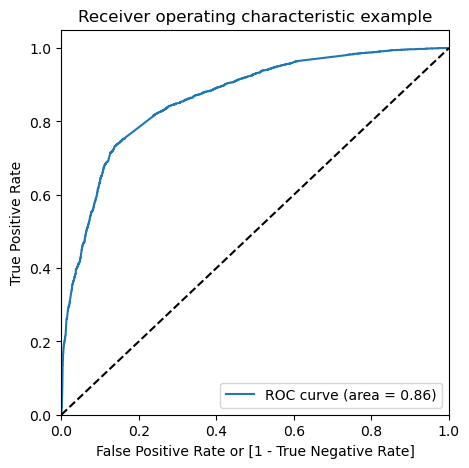

In [105]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Convert_prob)

#### Closer the ROC curve to the left border, the better it is

# 9.: Finding Optimal Cutoff Point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [106]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Convert_prob    ID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
3334          0      0.010427  3334          0    1    0    0    0    0    0   
712           0      0.162828   712          0    1    1    0    0    0    0   
3938          0      0.333843  3938          0    1    1    1    1    0    0   
6636          1      0.876595  6636          1    1    1    1    1    1    1   
2992          0      0.362930  2992          0    1    1    1    1    0    0   

      0.6  0.7  0.8  0.9  
3334    0    0    0    0  
712     0    0    0    0  
3938    0    0    0    0  
6636    1    1    1    0  
2992    0    0    0    0

In [107]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.386687     1.000000     0.000000
0.1   0.1  0.532508     0.982786     0.248612
0.2   0.2  0.695356     0.906325     0.562342
0.3   0.3  0.771517     0.833867     0.732206
0.4   0.4  0.810217     0.719376     0.867491
0.5   0.5  0.803870     0.661729     0.893488
0.6   0.6  0.784830     0.582866     0.912166
0.7   0.7  0.763003     0.483587     0.939172
0.8   0.8  0.737461     0.373499     0.966936
0.9   0.9  0.686687     0.203363     0.991418


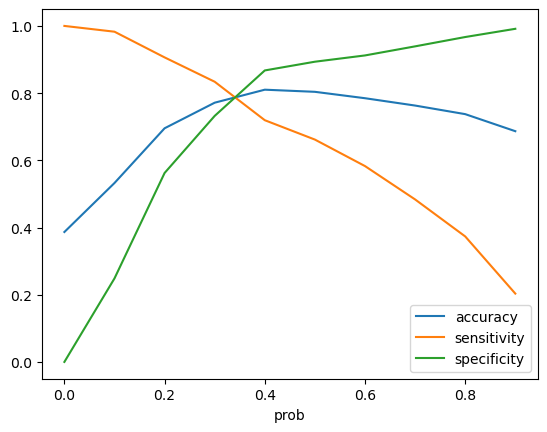

In [108]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [109]:
# Let's predict the outcome with this cutoff of 0.3
y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

Converted  Convert_prob    ID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
3334          0      0.010427  3334          0    1    0    0    0    0    0   
712           0      0.162828   712          0    1    1    0    0    0    0   
3938          0      0.333843  3938          0    1    1    1    1    0    0   
6636          1      0.876595  6636          1    1    1    1    1    1    1   
2992          0      0.362930  2992          0    1    1    1    1    0    0   

      0.6  0.7  0.8  0.9  final_predicted  
3334    0    0    0    0                0  
712     0    0    0    0                0  
3938    0    0    0    0                1  
6636    1    1    1    0                1  
2992    0    0    0    0                1

In [125]:
# Let's check the overall accuracy now 
Accuracy_train = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
Accuracy_train

0.7715170278637771

In [111]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2901, 1061],
       [ 415, 2083]], dtype=int64)

In [112]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [114]:
# Let's see the sensitivity of our logistic regression model
Sensitivity_train = (TP / float(TP+FN))*100
Sensitivity_train

83.38670936749399

In [115]:
Specificity_train = (TN / float(TN+FP))*100
Specificity_train

73.2205956587582

In [116]:
# Calculate false postive rate - predicting Converted when customer hasn't converted
print((FP/ float(TN+FP))*100)

26.779404341241797


In [117]:
# Positive predictive value 
print((TP / float(TP+FP))*100)

66.2531806615776


In [118]:
# Negative predictive value
print ((TN / float(TN+ FN))*100)

87.48492159227985


## Precision and Recall

Precision
TP / TP + FP

In [122]:
from sklearn.metrics import precision_score, recall_score
Precision_Train = (confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])*100)
Precision_Train

66.2531806615776

Recall
TP / TP + FN

In [123]:
Recall_Train = (confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])*100)
Recall_Train

83.38670936749399

#### High recall indicates that the model is capturing a large proportion of actual positive instances, which is desirable in scenarios where it's important to avoid false negatives which in this case is a probable lead

### Precision and recall tradeoff - train set

In [126]:
from sklearn.metrics import precision_recall_curve

In [127]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(3334    0
 712     0
 3938    0
 6636    1
 2992    0
 7999    0
 4331    1
 6819    1
 1050    1
 8706    0
 4601    0
 7391    1
 3083    1
 2177    0
 2938    1
 8886    1
 7933    0
 2848    0
 5157    0
 2716    0
 499     0
 8329    0
 504     0
 6381    1
 8539    1
 1837    0
 1757    0
 5588    1
 6376    0
 498     0
 6912    1
 3200    0
 6962    0
 3574    0
 4769    1
 6187    0
 4084    0
 3777    1
 8946    1
 4488    1
 4932    0
 2199    1
 1600    0
 6793    0
 5497    0
 8557    0
 7716    1
 3824    1
 2969    0
 5424    0
 2281    1
 4775    1
 2718    0
 561     0
 936     1
 7194    0
 8604    0
 9169    1
 8698    0
 6715    0
 7750    1
 2444    1
 543     0
 455     0
 5064    0
 8063    1
 9113    0
 3858    0
 8733    0
 1413    0
 7995    0
 6396    0
 8363    0
 6976    0
 4073    0
 8338    1
 4648    1
 6558    1
 300     0
 3845    1
 8120    1
 7384    0
 8036    0
 6990    1
 7318    0
 1906    0
 1511    1
 2841    1
 5031    0
 5949    0
 6817    0

In [128]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Convert_prob)

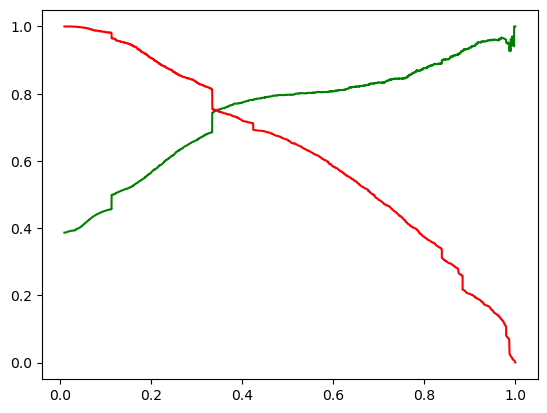

In [129]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# 10. Making predictions on the test set

In [130]:
# Scaling the variables of the test set. Using only transform and not fit

X_test[['TotalVisits','Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website']])

X_test.head()

Do Not Email  TotalVisits  Total Time Spent on Website  Search  \
7494             0     1.111873                    -0.594595       0   
496              0     0.513315                    -0.642028       0   
5831             0    -0.983081                    -0.884666       0   
7286             0    -0.384523                    -0.842706       0   
5312             0    -0.085244                    -0.191414       0   

      Newspaper Article  X Education Forums  Newspaper  Digital Advertisement  \
7494                  0                   0          0                      0   
496                   0                   0          0                      0   
5831                  0                   0          0                      0   
7286                  0                   0          0                      0   
5312                  0                   0          0                      0   

      Through Recommendations  A free copy of Mastering The Interview  \
7494                        0                                       0   
496                         0                                       0   
5831                        0                                       0   
7286                        0                                       0   
5312                        0                                       0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
7494                                    0                          0   
496                                     0                          0   
5831                                    0                          0   
7286                                    0                          0   
5312                                    1                          0   

      Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
7494                        0                           0   
496                         0                           0   
5831                        0                           0   
7286                        0                           0   
5312                        0                           0   

      Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
7494                           0                     0                   0   
496                            0                     0                   0   
5831                           0                     0                   0   
7286                           0                     0                   1   
5312                           0                     0                   1   

      Lead Source_Live Chat  Lead Source_NC_EDM  Lead Source_Olark Chat  \
7494                      0                   0                       0   
496                       0                   0                       0   
5831                      0                   0                       1   
7286                      0                   0                       0   
5312                      0                   0                       0   

      Lead Source_Organic Search  Lead Source_Pay per Click Ads  \
7494                           1                              0   
496                            0                              0   
5831                           0                              0   
7286                           0                              0   
5312                           0                              0   

      Lead Source_Press_Release  Lead Source_Reference  \
7494                          0                      0   
496                           0                      0   
5831                          0                      0   
7286                          0                      0   
5312                          0                      0   

      Lead Source_Referral Sites  Lead Source_Social Media  \
7494                           0                         0   
496                            1                   

In [134]:
# Using the same list of columns as in the model 2(logm2)
col_test = X_train_2.columns[1:] 

In [135]:
# Amending final set accordingly
X_test_final = X_test[col_test]               

In [136]:
# Adding constant as needed while using statsmodel
X_test_final = sm.add_constant(X_test_final)

y_pred_test = logm2.predict(X_test_final)      # Predicting the final test set

### Making predictions on the test set

In [139]:
# Saving the predictions in a new dataset

y_test_pred_final = pd.DataFrame({'Converted':y_test.values,'Converted_prob':y_pred_test,'ID':y_test.index})

y_test_pred_final.head()

Converted  Converted_prob    ID
7494          0        0.155900  7494
496           0        0.042483   496
5831          0        0.112757  5831
7286          0        0.111265  7286
5312          1        0.109435  5312

In [140]:
y_test_pred_final[:10]

Converted  Converted_prob    ID
7494          0        0.155900  7494
496           0        0.042483   496
5831          0        0.112757  5831
7286          0        0.111265  7286
5312          1        0.109435  5312
9066          1        0.686478  9066
7611          0        0.044254  7611
8069          0        0.998367  8069
1035          1        0.286573  1035
5964          1        0.935626  5964

# Model Evaluation

In [141]:
# Predicting the outcomes with probability cutoff as 0.3 by creating new columns in the final test dataset

y_test_pred_final['Predicted']=y_test_pred_final['Converted_prob'].map(lambda x:1 if x >0.3 else 0 )  # Predicted value 

y_test_pred_final.head()

Converted  Converted_prob    ID  Predicted
7494          0        0.155900  7494          0
496           0        0.042483   496          0
5831          0        0.112757  5831          0
7286          0        0.111265  7286          0
5312          1        0.109435  5312          0

In [142]:
# Creating confusion matrix for test pred set
confusion_test=confusion_matrix(y_test_pred_final.Converted,y_test_pred_final.Predicted)
confusion_test

array([[1232,  475],
       [ 171,  891]], dtype=int64)

In [143]:
#Sensitivity score of test set
Sensitivity_test =(confusion_test[1,1]/(confusion_test[1,0]+confusion_test[1,1])*100)  
Sensitivity_test

83.89830508474576

In [144]:
#specificity score of the test set
Specificity_test =(confusion_test[0,0]/(confusion_test[0,0]+confusion_test[0,1])*100)  
Specificity_test

72.1734036321031

## Precision And Recall of the test set

In [145]:
#  Pecision score
Precision_test = (confusion_test[1,1]/(confusion_test[0,1]+confusion_test[1,1])*100)
Precision_test

65.22693997071742

In [146]:
#  Recall score
Recall_test = (confusion_test[1,1]/(confusion_test[1,0]+confusion_test[1,1])*100)
Recall_test

83.89830508474576

In [147]:
# Accuracy score of the test set

Accuracy_test = metrics.accuracy_score(y_test_pred_final.Converted,y_test_pred_final.Predicted)*100
Accuracy_test

76.67027807872878

### Overall Accuracy for test set is > 75% 

In [148]:
from sklearn.metrics import f1_score
print('F1_Score: ',f1_score(y_test_pred_final.Converted, y_test_pred_final.Predicted)*100)

F1_Score:  73.39373970345963


#### The F1-score is a metric that combines both precision and recall into a single value, providing a balanced assessment of a classification model's performance. It is particularly useful when there is an uneven class distribution, as it considers both false positives and false negatives.
#### A an F1-score of approximately 73. \3\ t suggests thatheur model achieves a good balance between precision and recall. A higher F1-score indicates better overall performance of the model in terms of both false positives and false negatives.

In [152]:
print('Comparing basic metrics of Test and Train Models:')
print()
print('Sensitivity_Train:',Sensitivity_train)   
print('Specificity_Train:',Specificity_train)
print('Precision_Train:',Precision_Train) 
print('Recall_Train:',Recall_Train)
print('Accuracy_Train:',Accuracy_train)
print()
print('-----------------------')
print()
print('Sensitivity_Test:',Sensitivity_test)   
print('Specificity_Test:',Specificity_test)
print('Precision_Test:',Precision_test) 
print('Recall_Test:',Recall_test)
print('Accuracy_Test:',Accuracy_test)

Comparing basic metrics of Test and Train Models:

Sensitivity_Train: 83.38670936749399
Specificity_Train: 73.2205956587582
Precision_Train: 66.2531806615776
Recall_Train: 83.38670936749399
Accuracy_Train: 0.7715170278637771

-----------------------

Sensitivity_Test: 83.89830508474576
Specificity_Test: 72.1734036321031
Precision_Test: 65.22693997071742
Recall_Test: 83.89830508474576
Accuracy_Test: 76.67027807872878


### All scores compared to each other are within the range of 5% which is ideal

# FINAL STEP: Assigning a lead score

In [154]:
#Adding the column of lead score

y_test_pred_final['Lead Score']=y_test_pred_final['Converted_prob'].apply(lambda x:round(x*100))

y_test_pred_final.head(50)

Converted  Converted_prob    ID  Predicted  Lead Score
7494          0        0.155900  7494          0          16
496           0        0.042483   496          0           4
5831          0        0.112757  5831          0          11
7286          0        0.111265  7286          0          11
5312          1        0.109435  5312          0          11
9066          1        0.686478  9066          1          69
7611          0        0.044254  7611          0           4
8069          0        0.998367  8069          1         100
1035          1        0.286573  1035          0          29
5964          1        0.935626  5964          1          94
525           0        0.292647   525          0          29
6973          0        0.481244  6973          1          48
914           1        0.333843   914          1          33
6818          0        0.048187  6818          0           5
3283          0        0.084047  3283          0           8
8909          1        0.112757  8909          0          11
6831          0        0.175097  6831          0          18
643           1        0.333843   643          1          33
5764          0        0.063860  5764          0           6
1474          0        0.652064  1474          1          65
5977          0        0.112757  5977          0          11
2853          1        0.588796  2853          1          59
3899          0        0.112757  3899          0          11
585           1        0.446937   585          1          45
6153          0        0.447062  6153          1          45
1827          0        0.382130  1827          1          38
8413          1        0.825294  8413          1          83
6236          0        0.112757  6236          0          11
2643          1        0.986268  2643          1          99
7577          1        0.333843  7577          1          33
4842          0        0.112757  4842          0          11
3852          1        0.577833  3852          1          58
962           1        0.613438   962          1          61
7075          0        0.303255  7075          1          30
2921          1        0.979017  2921          1          98
8035          1        0.333843  8035          1          33
5281          0        0.686687  5281          1          69
5941          0        0.056286  5941          0           6
5224          0        0.250211  5224          0          25
3998          1        0.173816  3998          0          17
4091          1        0.730245  4091          1          73
446           1        0.986268   446          1          99
6995          1        0.528393  6995          1          53
8564          1        0.339285  8564          1          34
8487          0        0.264348  8487          0          26
4349          1        0.326459  4349          1          33
8009          0        0.780140  8009          1          78
5526          1        0.112757  5526          0          11
3232          1        0.253516  3232          0          25
8806          0        0.189384  8806          0          19